# 数据挖掘作业 1 数据探索性分析与预处理

**姓名：李懿**

**学号：2120151008**

**日期：2016.5.28**

### 数据分析要求

**1. 数据可视化和摘要**

- 数据摘要

对标称属性，给出每个可能取值的频数

对数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。

- 数据的可视化

针对数值属性：

绘制直方图，如mxPH，用qq图检验其分布是否为正态分布。

绘制盒图，对离群值进行识别。

对7种海藻，分别绘制其数量与标称变量，如size的条件盒图

**2. 数据缺失的处理**

- 分别使用下列四种策略对缺失值进行处理，处理后可视化地对比新旧数据集。

1.将缺失部分剔除
2.用最高频率值来填补缺失值
3.通过属性的相关关系来填补缺失值
4.通过数据对象之间的相似性来填补缺失值

### 解答内容

In [70]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Step1. 数据处理**

- 将原始txt文件转换为易于处理的csv文件

In [2]:
# 转换文件格式，生成csv文件
fp_origin = open("./Analysis.txt", 'r')
fp_modified = open("./Analysis.csv", 'w')

line = fp_origin.readline()
while(line):
    temp = line.strip().split()
    temp = ','.join(temp)+'\n'
    fp_modified.write(temp)
    line = fp_origin.readline()
    
fp_origin.close()
fp_modified.close()

**Step2. 读取数据**

- 读取csv文件，生成data frame

In [114]:
# 定义两类数据：标称型和数值型
name_category = ["season", "river_size", "river_speed"]
name_value = ["mxPH", "mnO2", "Cl", "NO3", "NH4", "oPO4", "PO4", "Chla", "a1", "a2", "a3", "a4", "a5", "a6", "a7"]
# 存储7种海藻对应的名称
name_seaweed = ["a1", "a2", "a3", "a4", "a5", "a6", "a7"]

# 读取数据
data_origin = pd.read_csv("./Analysis.csv", 
                   names = name_category+name_value,
                   na_values = "XXXXXXX")

# 将字符数据转换为category
for item in name_category:
    data_origin[item] = data_origin[item].astype('category')

# 查看前10条数据内容
data_origin.iloc[:10]

,season,river_size,river_speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
5,winter,small,high,8.25,13.1,65.750,9.248,430.00000,18.250,56.66700,28.400,15.1,14.6,1.4,0.0,22.5,12.6,2.9
6,summer,small,high,8.15,10.3,73.250,1.535,110.00000,61.250,111.75000,3.200,2.4,1.2,3.2,3.9,5.8,6.8,0.0
7,autumn,small,high,8.05,10.6,59.067,4.990,205.66701,44.667,77.43400,6.900,18.2,1.6,0.0,0.0,5.5,8.7,0.0
8,winter,small,medium,8.70,3.4,21.950,0.886,102.75000,36.300,71.00000,5.544,25.4,5.4,2.5,0.0,0.0,0.0,0.0
9,winter,small,high,7.93,9.9,8.000,1.390,5.80000,27.250,46.60000,0.800,17.0,0.0,0.0,2.9,0.0,0.0,1.7


**Step 3. 数据摘要**

- 对标称属性，给出每个可能取值的频数

In [105]:
# 使用value_counts函数统计每个标称属性的取值频数
for item in name_category:
    print item, '的频数为：\n', pd.value_counts(data_origin[item].values), '\n'

season 的频数为：
winter    62
spring    53
summer    45
autumn    40
dtype: int64 

river_size 的频数为：
medium    84
small     71
large     45
dtype: int64 

river_speed 的频数为：
high      84
medium    83
low       33
dtype: int64 



- 对数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。

In [5]:
# 最大值
data_show = pd.DataFrame(data = data_origin[name_value].max(), columns = ['max'])
# 最小值
data_show['min'] = data_origin[name_value].min()
# 均值
data_show['mean'] = data_origin[name_value].mean()
# 中位数
data_show['median'] = data_origin[name_value].median()
# 四分位数
data_show['quartile'] = data_origin[name_value].describe().loc['25%']
# 缺失值个数
data_show['missing'] = data_origin[name_value].describe().loc['count'].apply(lambda x : 200-x)

In [6]:
data_show

,max,min,mean,median,quartile,missing
mxPH,9.70000,5.600,8.011734,8.0600,7.70000,1.0
mnO2,13.40000,1.500,9.117778,9.8000,7.72500,2.0
Cl,391.50000,0.222,43.636279,32.7300,10.98125,10.0
NO3,45.65000,0.050,3.282389,2.6750,1.29600,2.0
NH4,24064.00000,5.000,501.295828,103.1665,38.33325,2.0
oPO4,564.59998,1.000,73.590596,40.1500,15.70000,2.0
PO4,771.59998,1.000,137.882101,103.2855,41.37525,2.0
Chla,110.45600,0.200,13.971197,5.4750,2.00000,12.0
a1,89.80000,0.000,16.923500,6.9500,1.50000,0.0
a2,72.60000,0.000,7.458500,3.0000,0.00000,0.0


**Step 4. 数据可视化 **

- 针对数值属性：
绘制直方图，如mxPH，用qq图检验其分布是否为正态分布。

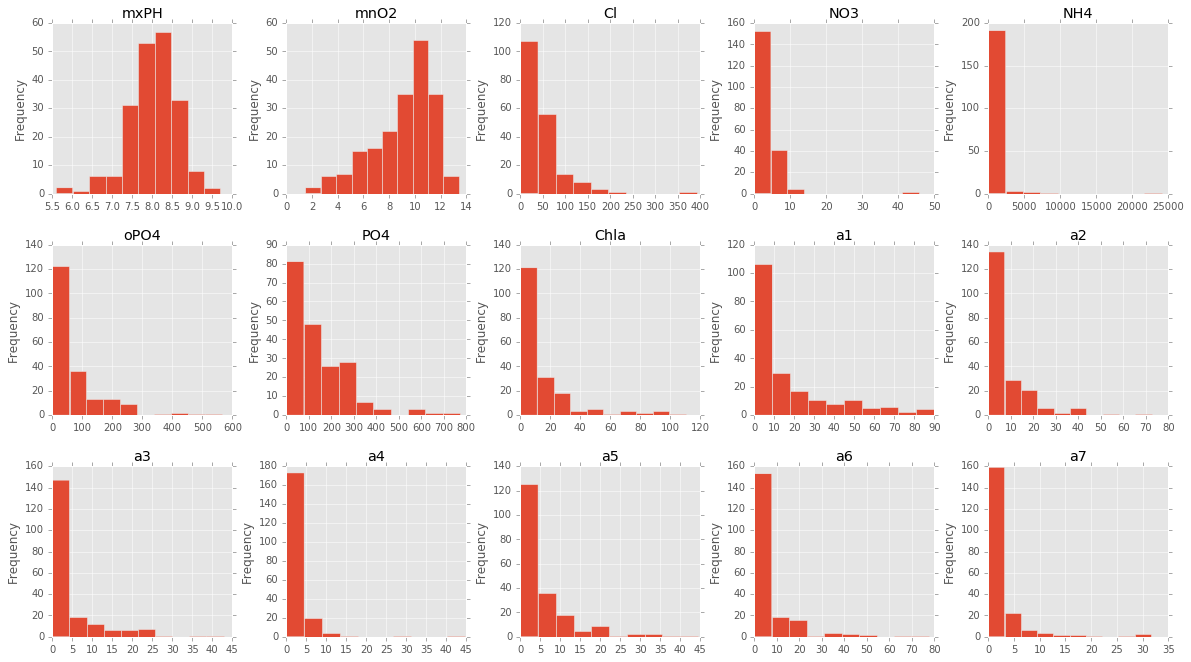

In [99]:
# 直方图
fig = plt.figure(figsize = (20,11))
i = 1
for item in name_value:
    fig.add_subplot(3, 5, i)
    data_origin[item].plot(kind = 'hist', title = item)
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

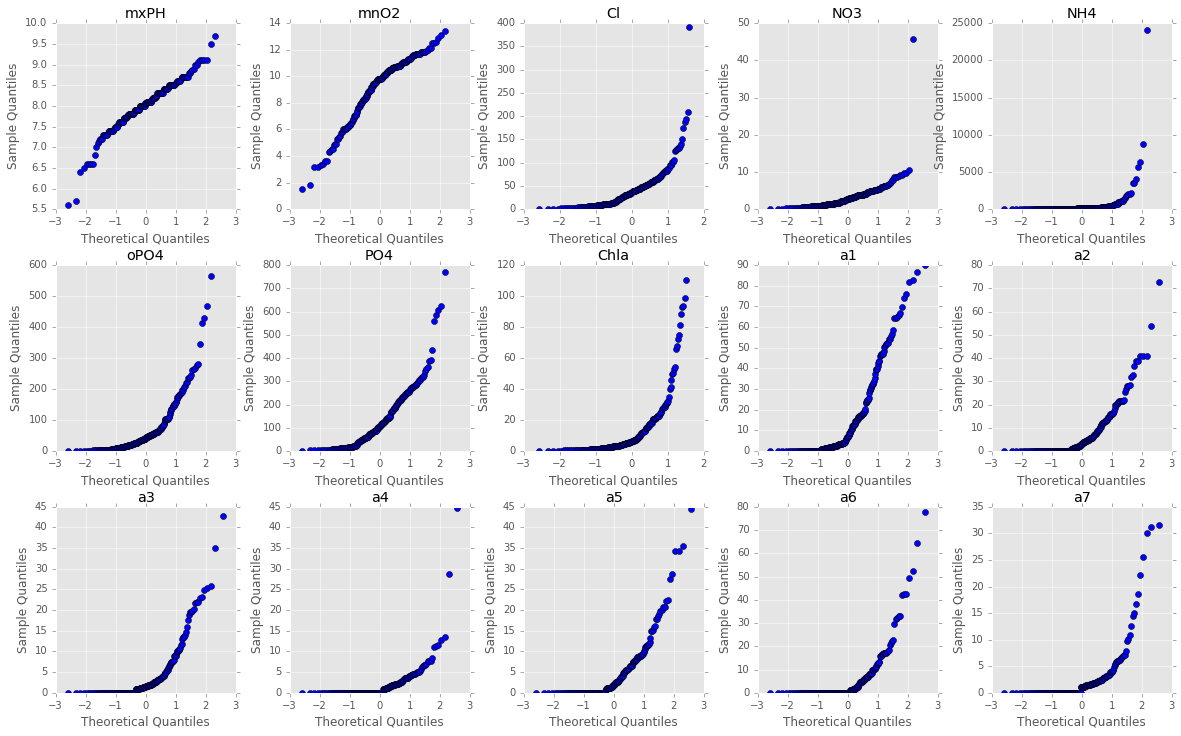

In [97]:
# qq图
fig = plt.figure(figsize = (20,12))
i = 1
for item in name_value:
    ax = fig.add_subplot(3, 5, i)
    sm.qqplot(data_origin[item], ax = ax)
    ax.set_title(item)
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

从qq图中可以看出，只有mxPH和mnO2两项值符合正态分布，其他值均不符合

- 绘制盒图，对离群值进行识别。

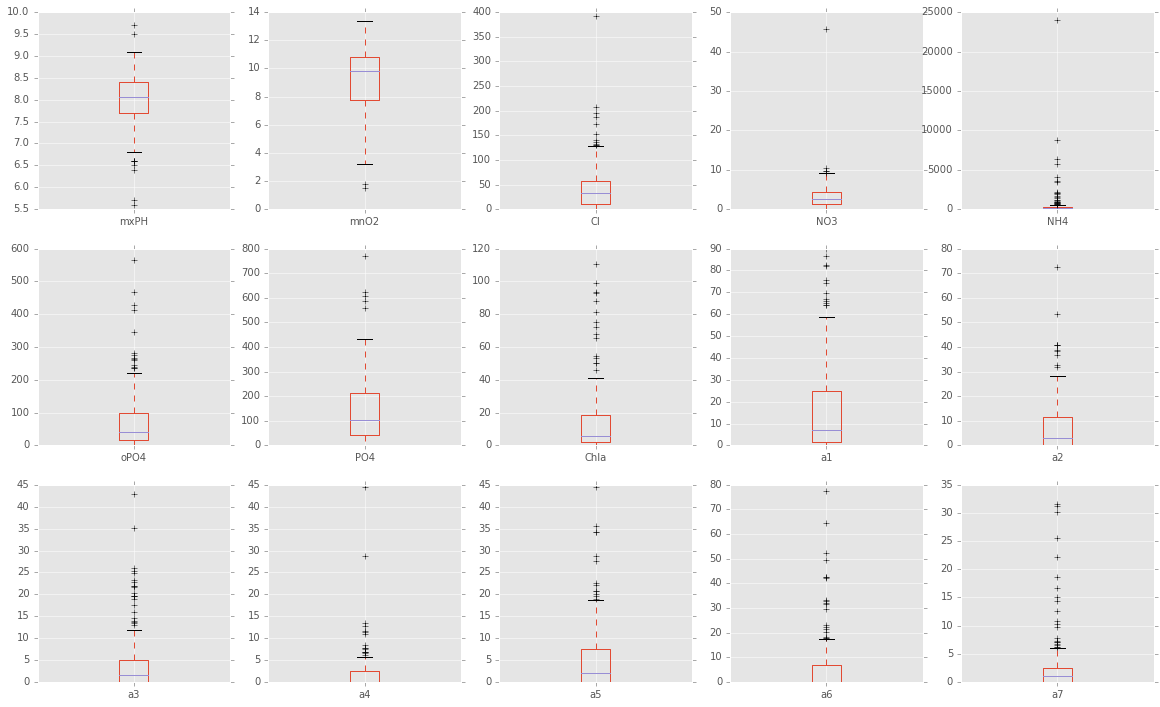

In [88]:
# 盒图
fig = plt.figure(figsize = (20,12))
i = 1
for item in name_value:
    ax = fig.add_subplot(3, 5, i)
    data_origin[item].plot(kind = 'box')
    i += 1

- 对7种海藻，分别绘制其数量与标称变量，如size的条件盒图

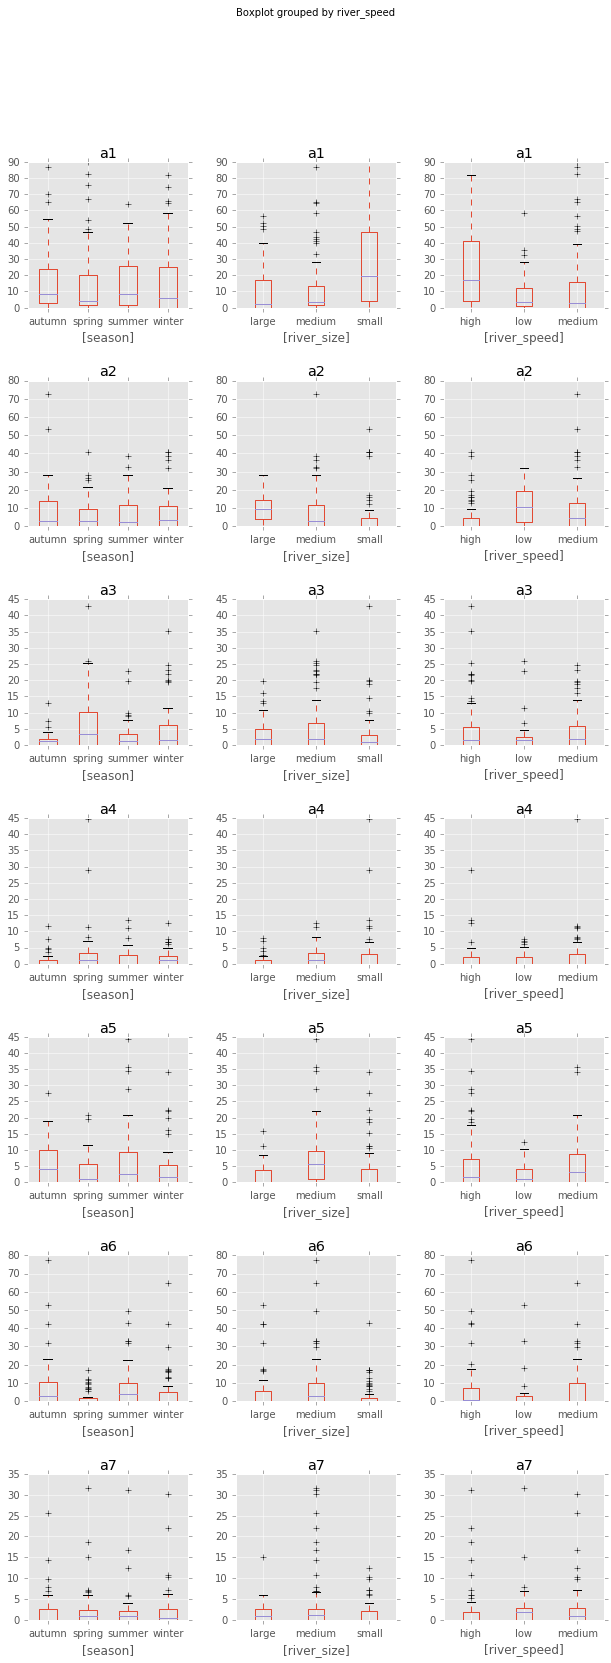

In [111]:
# 条件盒图
fig = plt.figure(figsize = (10, 27))
i = 1
for seaweed in name_seaweed:
    for category in name_category:
        ax = fig.add_subplot(7, 3, i)
        data_origin[[seaweed, category]].boxplot(by = category, ax = ax)
        ax.set_title(seaweed)
        i += 1
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

**Step 4. 数据缺失的处理**

- 将缺失部分剔除

In [135]:
data_drop = data_origin.dropna()

In [136]:
data_drop.describe()

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,8.078288,9.018587,44.880886,3.384071,537.671598,78.269446,146.577647,13.882799,15.316848,7.777174,4.613043,1.845652,5.493478,6.447283,2.665217
std,0.471706,2.407158,47.066996,3.874711,2031.584860,92.621485,129.108148,20.264630,20.316977,11.261313,7.151678,3.980359,7.661098,12.034853,5.331993
min,7.000000,1.500000,0.800000,0.050000,5.800000,1.250000,2.500000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.777500,7.675000,11.854750,1.364250,49.375000,18.562750,50.341250,2.075000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.100000,9.750000,35.080000,2.820000,115.714000,46.283500,115.600000,5.522000,4.850000,3.600000,1.700000,0.000000,2.650000,0.000000,1.000000
75%,8.400000,10.700000,58.515000,4.540000,235.250000,102.828500,220.251250,18.307500,19.325000,11.700000,5.525000,2.425000,8.000000,7.975000,2.700000
max,9.500000,13.400000,391.500000,45.650000,24064.000000,564.599980,771.599980,110.456000,89.800000,72.600000,42.800000,44.600000,44.400000,77.600000,31.600000


- 用最高频率值来填补缺失值

- 通过属性的相关关系来填补缺失值

- 通过数据对象之间的相似性来填补缺失值